<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/anujapande2001_gmail_com_MedicalCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Medical Cost Model**

### **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

### **Import Dataset**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/MedicalCost/train_data.csv")
data.head(10)



,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900
5,63,female,26.220,0,no,northwest,287,14256.19280
6,38,female,19.950,2,no,northeast,1290,7133.90250
7,28,female,26.315,3,no,northwest,1113,5312.16985
8,25,male,26.800,3,no,southwest,294,3906.12700
9,18,female,30.115,0,no,northeast,471,2203.47185


### **Dataset Description**




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


### **Check any Inconsistent values in Dataset**

In [5]:
print((data==0).sum(), "\n")
print(data.isna().sum())
print((data=="Unknown").sum(), "\n")

age           0
sex           0
bmi           0
children    425
smoker        0
region        0
id            1
charges       0
dtype: int64 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64 



In [6]:
data.describe()


,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


### **Detect Outliers and distribution of features**

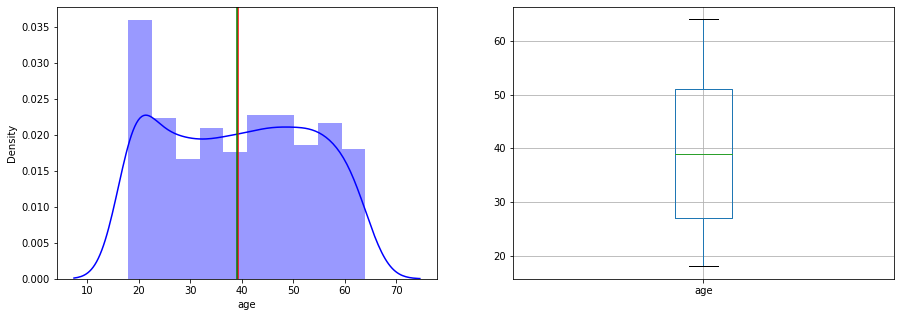

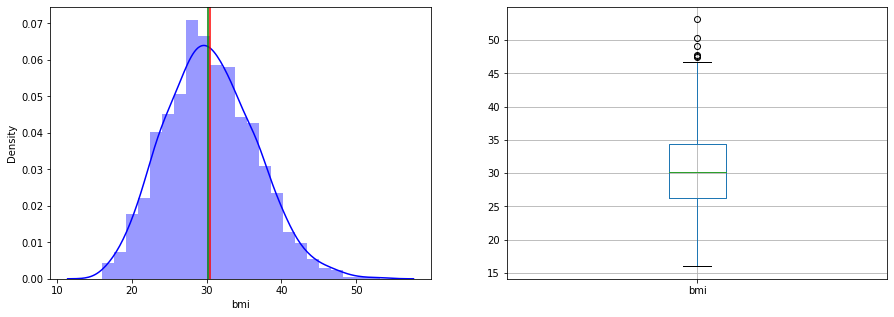

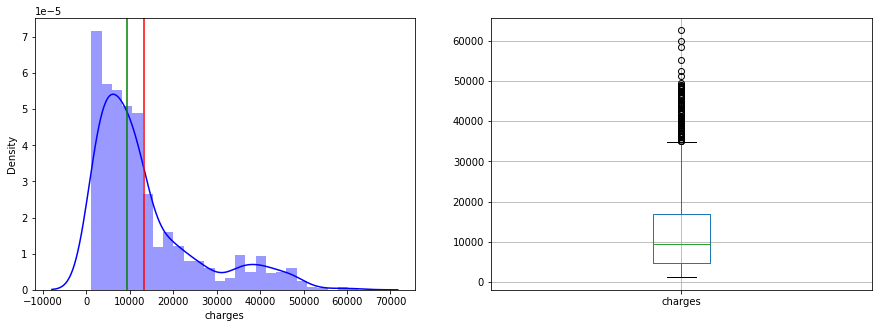

In [7]:
Contcolumn=["age","bmi","charges"]
for col in Contcolumn:
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  data.boxplot(column=col)



## **EDA**

### **Check the distribution of different features**

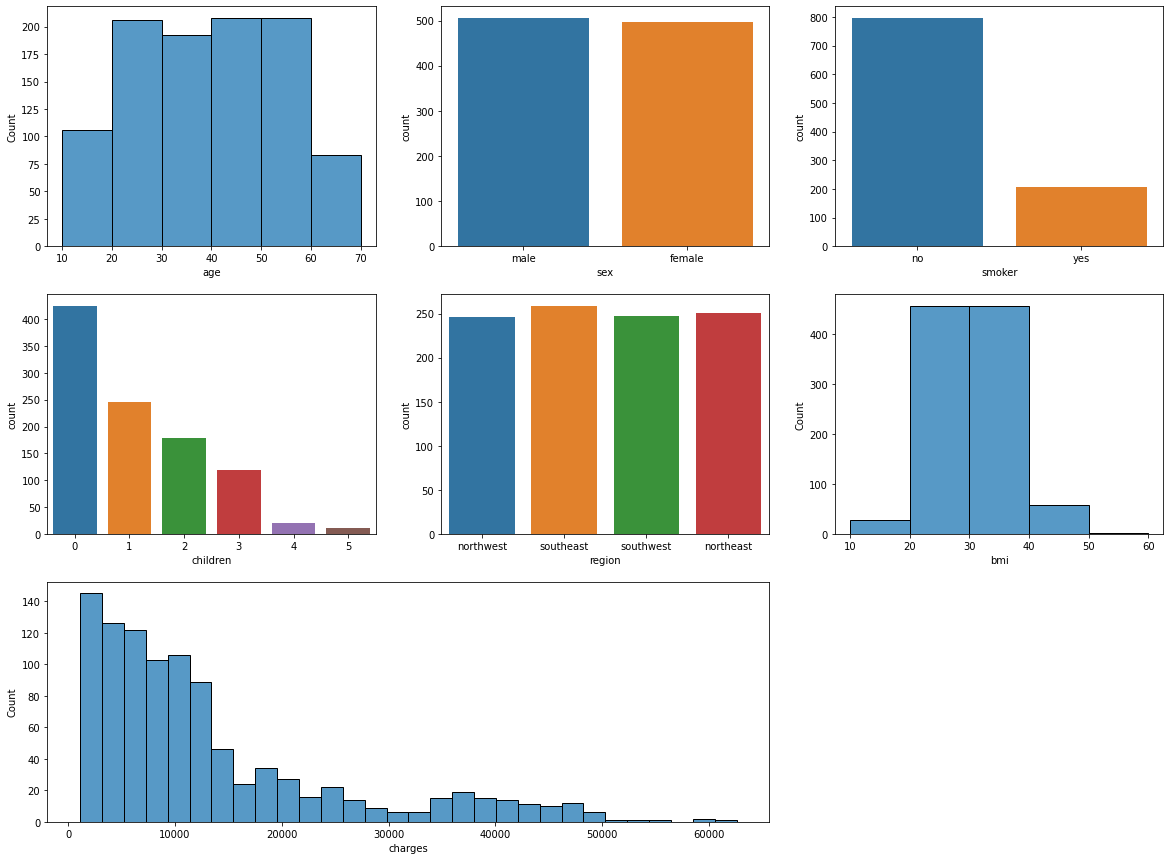

In [8]:
fig=plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.histplot(x="age",bins=np.arange(10,80,10), data=data)
# plt.xticks(rotation=45)
plt.subplot(3,3,2)
sns.countplot(x="sex",data=data)

plt.subplot(3,3,3)
sns.countplot(x="smoker",data=data)

plt.subplot(3,3,4)
sns.countplot(x="children",data=data)

plt.subplot(3,3,5)
sns.countplot(x="region",data=data)

plt.subplot(3,3,6)
sns.histplot(x="bmi",bins=np.arange(10,70,10), data=data)

plt.subplot(3,3,(7,8))
sns.histplot(x="charges",bins=30, data=data)



## **Analyzing Charges Vs Other Parameters**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

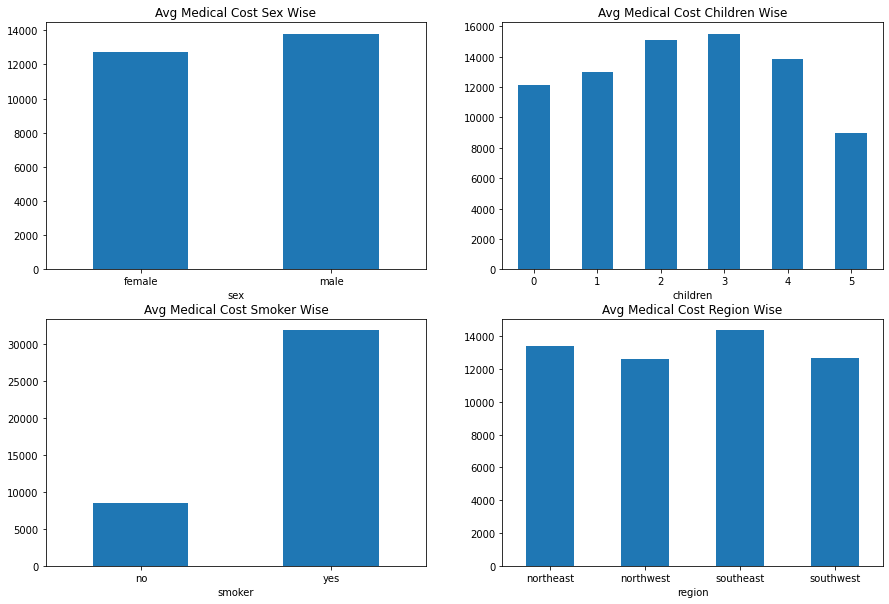

In [9]:
fig=plt.figure(figsize=[15,10])
plt.subplot(2,2,1)

data.groupby("sex")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Sex Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,2)
data.groupby("children")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Children Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,3)
data.groupby("smoker")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Smoker Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,4)
data.groupby("region")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Region Wise")
plt.xticks(rotation=0)



### **Checking if relationship is linear between input features and target variable**

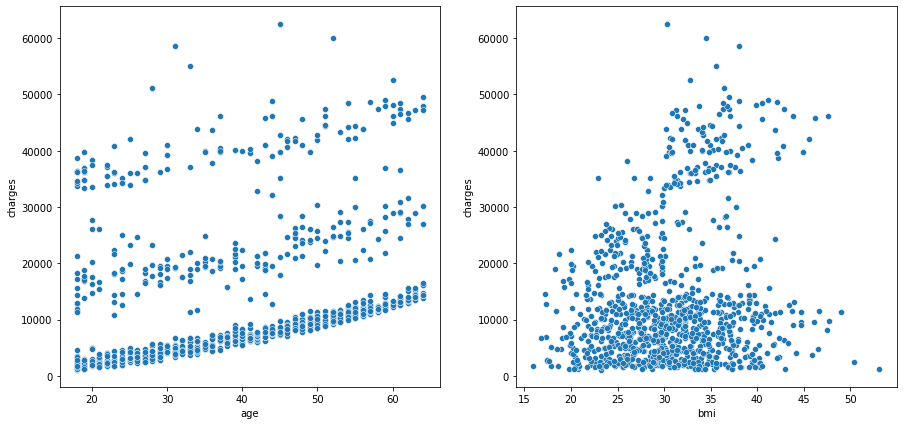

In [10]:
fig=plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.scatterplot(x="age", y="charges",data=data)
plt.subplot(1,2,2)
sns.scatterplot(x="bmi", y="charges",data=data)

## **Check Multicolinearity**

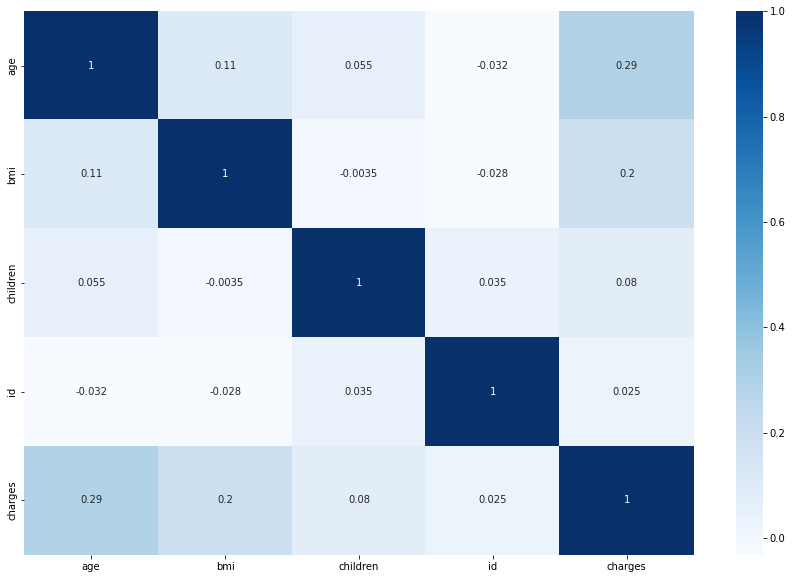

In [11]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="white")


## **DataEncoding**

In [12]:
data = pd.get_dummies(data)
data



,age,bmi,children,id,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,24,23.655,0,693,2352.96845,0,1,1,0,0,1,0,0
1,28,26.510,2,1297,4340.44090,1,0,1,0,0,0,1,0
2,51,39.700,1,634,9391.34600,0,1,1,0,0,0,0,1
3,47,36.080,1,1022,42211.13820,0,1,0,1,0,0,1,0
4,46,28.900,2,178,8823.27900,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,18,31.350,4,1095,4561.18850,1,0,1,0,1,0,0,0
999,39,23.870,5,1130,8582.30230,1,0,1,0,0,0,1,0
1000,58,25.175,0,1294,11931.12525,0,1,1,0,1,0,0,0
1001,37,47.600,2,860,46113.51100,1,0,0,1,0,0,0,1


## **Train Test Split**

In [13]:
X=data.drop(["id","charges","sex_female","smoker_no","region_northeast"],axis=1)
y=data.charges

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=35)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(651, 8)
(651,)
(352, 8)
(352,)


## **Scaling**

In [14]:
myScaler=RobustScaler()
X_train_scale=pd.DataFrame(myScaler.fit_transform(X_train), columns=X_train.columns)
X_test_scale=pd.DataFrame(myScaler.transform(X_test),columns=X_train.columns)

### **Build Model using Logical Regression**

R2 Score for train data using Linear Regression is  0.7562730263614235
R2 Score for test data using Linear Regression is  0.7143698501332976
Adjusted R2 score for training set using Linear Regression is 0.753235930116706
Adjusted R2 score for test set using Linear Regression is 0.7077079224396136


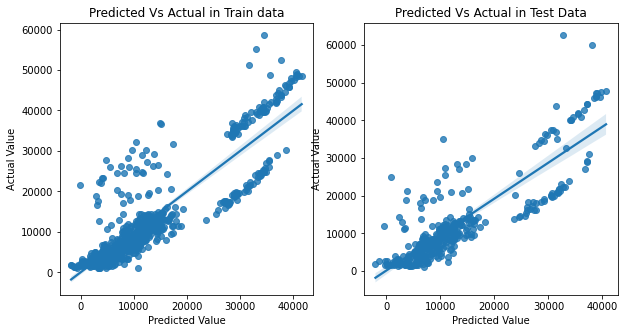

In [15]:
from sklearn import metrics
modelLR=LinearRegression()
modelLR.fit(X_train_scale,y_train)
y_train_pred=modelLR.predict(X_train_scale)
y_test_pred=modelLR.predict(X_test_scale)


figure=plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.regplot(y_train_pred,y_train)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.subplot(1,2,2)
sns.regplot(y_test_pred,y_test)
plt.title("Predicted Vs Actual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

r2_train=metrics.r2_score(y_train,y_train_pred)
r2_test=metrics.r2_score(y_test,y_test_pred)
print ("R2 Score for train data using Linear Regression is ",r2_train)
print ("R2 Score for test data using Linear Regression is ",r2_test)

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set using Linear Regression is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set using Linear Regression is {}".format(adj_r_squared_test))

### **Checking Assumption of Linear Regression**

Text(0.5, 1.0, 'Checking Distribution of Residual in Test Data')

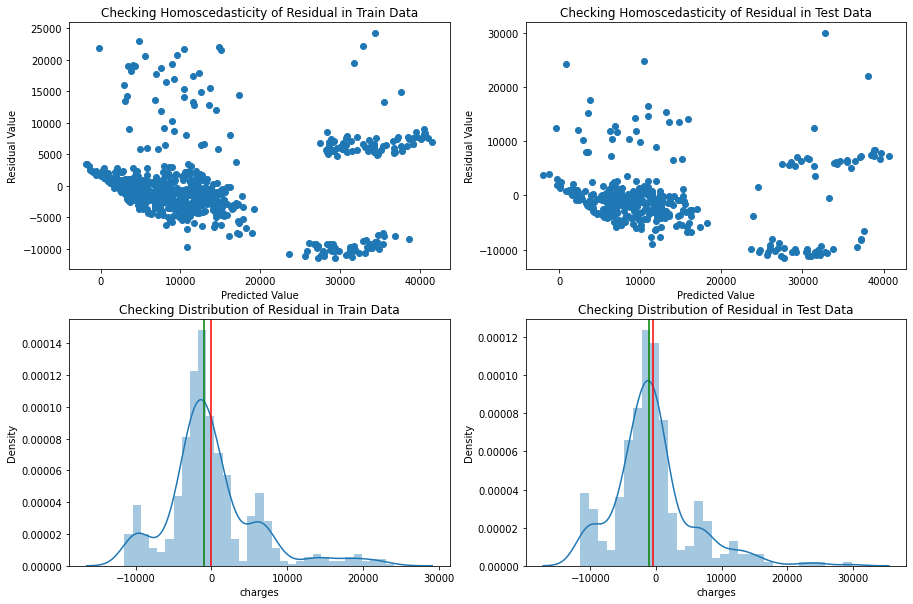

In [16]:
figure=plt.figure(figsize=[15,10])
# Checking Homoscedasticity of Residual
plt.subplot(2,2,1)

plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Checking Homoscedasticity of Residual in Train Data")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")

plt.subplot(2,2,2)
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title("Checking Homoscedasticity of Residual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")

# Checking Distribution of residual
plt.subplot(2,2,3)
sns.distplot(y_train-y_train_pred)
plt.axvline((y_train-y_train_pred).mean(), color="r")
plt.axvline((y_train-y_train_pred).median(), color="g")
plt.title("Checking Distribution of Residual in Train Data")


plt.subplot(2,2,4)
sns.distplot(y_test-y_test_pred)
plt.axvline((y_test-y_test_pred).mean(), color="r")
plt.axvline((y_test-y_test_pred).median(), color="g")
plt.title("Checking Distribution of Residual in Test Data")

## **Build Model- Decision Tree Regression**

R2 Score for train data Decision Tree Regressor is  1.0
R2 Score for test data Decision Tree Regressor is  0.597171483718111
Adjusted R2 score for training set Decision Tree Regressor is 1.0
Adjusted R2 score for test set Decision Tree Regressor is 0.5877760664287375


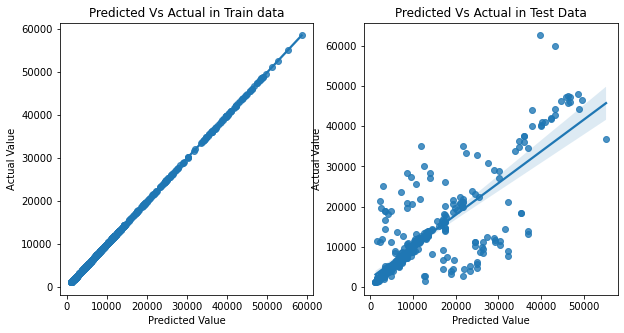

In [17]:
modelDT=DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.feature_importances_

y_train_pred=modelDT.predict(X_train)
y_test_pred=modelDT.predict(X_test)


figure=plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.regplot(y_train_pred,y_train)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.subplot(1,2,2)
sns.regplot(y_test_pred,y_test)
plt.title("Predicted Vs Actual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")


r2_train=metrics.r2_score(y_train,y_train_pred)
r2_test=metrics.r2_score(y_test,y_test_pred)
print ("R2 Score for train data Decision Tree Regressor is ",r2_train)
print ("R2 Score for test data Decision Tree Regressor is ",r2_test)

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set Decision Tree Regressor is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set Decision Tree Regressor is {}".format(adj_r_squared_test))

## **HyperParameter Tuning of Decision Tree using RandomSearch**

R2 Score for train data using Decision Tree Regressor and tuning with Random Search  is  0.86381023982315
R2 Score for test data using Decision Tree Regressor and tuning with Random Search is  0.8366466565470926
Adjusted R2 score for training set using Decision Tree Regressor and tuning with Random Search is 0.8621131711605101
Adjusted R2 score for test set using Decision Tree Regressor and tuning with Random Search is 0.8328366660292406


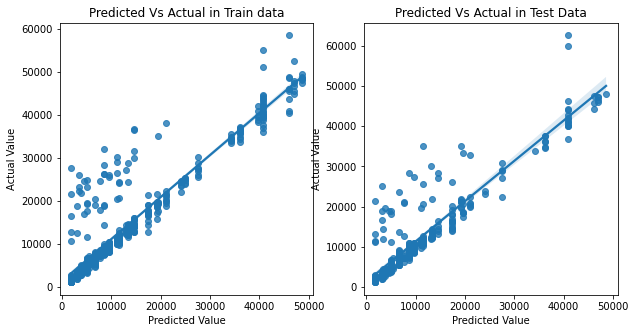

In [18]:
param_list={
            "criterion" : ["squared_error", "absolute_error", "poisson"],
             "splitter":["best","random"],
            "max_depth" : [None,2,3,4,5,6],
           "min_samples_leaf":[1,2,3,4,5],
            # "min_samples_split" :[2,3,4,5],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50]
            }

modelDTRandomCV=RandomizedSearchCV(estimator=modelDT,param_distributions=param_list,cv=10,n_jobs=-1,n_iter=600)
modelDTRandomCV.fit(X_train,y_train)
y_train_pred=modelDTRandomCV.predict(X_train)
y_test_pred=modelDTRandomCV.predict(X_test)

figure=plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.regplot(y_train_pred,y_train)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.subplot(1,2,2)
sns.regplot(y_test_pred,y_test)
plt.title("Predicted Vs Actual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

r2_train=metrics.r2_score(y_train,y_train_pred)
r2_test=metrics.r2_score(y_test,y_test_pred)
print ("R2 Score for train data using Decision Tree Regressor and tuning with Random Search  is ",r2_train)
print ("R2 Score for test data using Decision Tree Regressor and tuning with Random Search is ",r2_test)

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set using Decision Tree Regressor and tuning with Random Search is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set using Decision Tree Regressor and tuning with Random Search is {}".format(adj_r_squared_test))

## **Build Model-Random Forest**

R2 Score for train data Random Forest Regressor is  0.9766854865584111
R2 Score for test data Random Forest Regressor is  0.817076053005136
Adjusted R2 score for training set using Random Forest Regressor is 0.9763949630264287
Adjusted R2 score for test set using Random Forest Regressor is 0.8128096052618156


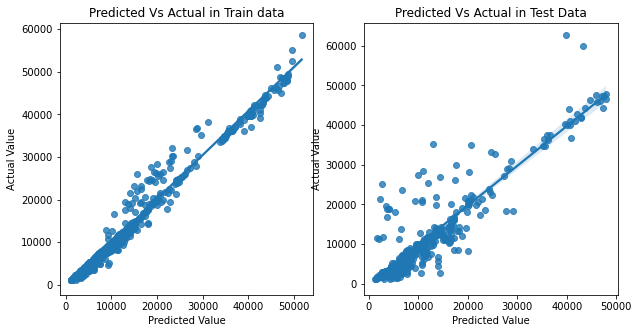

In [19]:
modelRF=RandomForestRegressor(random_state=0)
modelRF.fit(X_train,y_train)

y_train_pred=modelRF.predict(X_train)
y_test_pred=modelRF.predict(X_test)

figure=plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.regplot(y_train_pred,y_train)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.subplot(1,2,2)
sns.regplot(y_test_pred,y_test)
plt.title("Predicted Vs Actual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

r2_train=metrics.r2_score(y_train,y_train_pred)
r2_test=metrics.r2_score(y_test,y_test_pred)
print ("R2 Score for train data Random Forest Regressor is ",r2_train)
print ("R2 Score for test data Random Forest Regressor is ",r2_test)

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set using Random Forest Regressor is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set using Random Forest Regressor is {}".format(adj_r_squared_test))

### **Hypertuning of Random Forest using RandomSearchCV**

R2 Score for train data using Random Forest Regressor and tuning with Random Search  is  0.8748542332242715
R2 Score for test data using Random Forest Regressor and tuning with Random Search is  0.8480486810683268
Adjusted R2 score for training set using Random Forest Regressor and tuning with Random Search is 0.8732947844170973
Adjusted R2 score for test set using Random Forest Regressor and tuning with Random Search is 0.8445046269824568


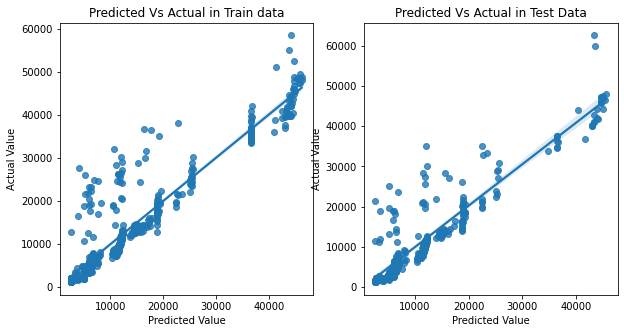

In [20]:
param_list={
            "criterion" : ["squared_error", "absolute_error", "poisson"],
            "max_depth" : [None,2,3,4,5,6],
           "min_samples_leaf":[1,2,3,4,5],
          #  "min_samples_split" :[2,3,4,5],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["auto","log2","sqrt",None],
             "n_estimators": [100, 400, 700],
           "max_leaf_nodes":[None,10,20,30,40,50]
            }


modelRFRandomCV=RandomizedSearchCV(estimator=modelRF,param_distributions=param_list,cv=5,n_jobs=-1,n_iter=700)
modelRFRandomCV.fit(X_train,y_train)
y_train_pred=modelRFRandomCV.predict(X_train)
y_test_pred=modelRFRandomCV.predict(X_test)

figure=plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.regplot(y_train_pred,y_train)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.subplot(1,2,2)
sns.regplot(y_test_pred,y_test)
plt.title("Predicted Vs Actual in Test Data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

r2_train=metrics.r2_score(y_train,y_train_pred)
r2_test=metrics.r2_score(y_test,y_test_pred)
print ("R2 Score for train data using Random Forest Regressor and tuning with Random Search  is ",r2_train)
print ("R2 Score for test data using Random Forest Regressor and tuning with Random Search is ",r2_test)

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set using Random Forest Regressor and tuning with Random Search is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set using Random Forest Regressor and tuning with Random Search is {}".format(adj_r_squared_test))

## **Predict Output using Test File**

In [26]:
data_test=pd.read_csv("/content/drive/MyDrive/TermProjects/MedicalCost/test_data.csv")
data_test=pd.get_dummies(data_test)
data_test_Copy=data_test.drop(["id","sex_female","smoker_no","region_northeast"],axis=1)

data_test_Copy=pd.DataFrame(myScaler.transform(data_test_Copy),columns=X_train.columns)
data_test_Copy
MedicalCost_Pred=modelRFRandomCV.predict(data_test_Copy)
MedicalCost_File=pd.DataFrame(MedicalCost_Pred)
MedicalCost_File.insert(0,"Id",data_test.id)

MedicalCost_File.to_csv("/content/drive/MyDrive/TermProjects/MedicalCost/MedicalCost_Output.csv", index=False, header=False)